# Import packages

In [1114]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score


variables à garder : 
['fam_ENQ', 'fl_fam_vam', 'niv_gravite_mtf_dne', 'fam_PCD',
       'Motif_Motif moyen', 'Motif_Motif tres mauvais',
       'Situation_fam_Mauvaise situation', 'Nature_op_Mauvaise nature']

# Import data

In [1115]:
df = pd.read_csv('../data/df.csv',sep = ',')

In [1116]:
df.columns

Index(['cd_op', 'MT_CHG_MSL', 'MT_PATRIM_NET', 'EAD_1an_avant_def', 'TX_APPOR',
       'dat_dec_echec', 'ANC_PRO_MAX_PFI', 'arrete', 'MT_EAD_RESID',
       'nb_bienHOP', 'cum_frs_externes', 'dls_mep_entree_def', 'NB_LO_HOP',
       'MT_CHA_CSM_REV', 'CD_DNE_CHR_LGD_SAIN', 'MT_EAD_DNE_CHR_d',
       'mt_rev_dispo', 'MT_REST_VIVRE', 'MR_arr', 'NB_DUR_PFI', 'fl_fonc',
       'AMI', 'solution', 'AGE_EMP1', 'NB_CHARGE_HORS_OPE_PFI', 'cum_dec',
       'MT_CHA_IMP', 'max_age_ctx', 'MT_CHA_PIV', 'MT_CHA_PIP', 'TX_ENDET',
       'cum_rec', 'nb_empr_ope', 'MT_PATRIM_MOB', 'fam_PCD', 'NB_RP_HOP',
       'dls_ges_def', 'mt_dec_cum_IMP_tot', 'fl_prt_Conso',
       'niv_gravite_mtf_dfs', 'MT_FMG', 'CD_POST_BIEN_PFI',
       'MT_CHA_HORS_OPE_PFI', 'ANC_BANC_MAX_PFI', 'MT_REV_PFI', 'DET', 'Motif',
       'Situation_fam', 'Nature', 'Solution_echec', 'Nature_op', 'MTF',
       'ETAT_CIVIL', 'CSP'],
      dtype='object')

In [1117]:
#df = df[['mt_dec_cum_IMP_tot','cd_op','arrete','DET']]

In [1118]:
#df.drop(columns = ['MT_EAD_RESID', 'fl_prise_de_gar', 'fam_hyp', 'PTG'])

In [1119]:
df.head()

,cd_op,MT_CHG_MSL,MT_PATRIM_NET,EAD_1an_avant_def,TX_APPOR,dat_dec_echec,ANC_PRO_MAX_PFI,arrete,MT_EAD_RESID,nb_bienHOP,...,MT_REV_PFI,DET,Motif,Situation_fam,Nature,Solution_echec,Nature_op,MTF,ETAT_CIVIL,CSP
0,I860708600,304.90,0.0,1121.38,0.00,0,84.0,2017-01-31,-3945.79,0,...,53781.0,0,Motif mauvais,Bonne situation,Bonne nature,Bonne solution,Bonne nature,Bon MTF,Mauvais etat,Bonne CSP
1,I950404213,2505.35,0.0,2475.00,0.10,0,203.0,2017-03-31,0.03,0,...,42070.0,0,Motif mauvais,Bonne situation,Mauvaise nature,Bonne solution,Mauvaise nature,Mauvais MTF,Bon etat,Mauvaise CSP
2,I950706618,0.00,45735.0,870.00,0.07,0,42.0,2016-08-31,1078.86,1,...,46380.0,1,Motif moyen,Bonne situation,Mauvaise nature,Bonne solution,Mauvaise nature,Mauvais MTF,Bon etat,Bonne CSP
3,I950901248,0.00,0.0,525.06,0.44,0,166.0,2017-01-31,525.06,0,...,18822.0,0,Motif moyen,Mauvaise situation,Mauvaise nature,Bonne solution,Mauvaise nature,Mauvais MTF,Mauvais etat,Mauvaise CSP
4,I960300578,0.00,0.0,815.46,0.47,0,3.0,2016-06-30,5835.03,0,...,12804.0,0,Motif mauvais,Bonne situation,Mauvaise nature,Bonne solution,Mauvaise nature,Mauvais MTF,Bon etat,Mauvaise CSP


# Data treatment

In [1120]:
df['arrete'] = pd.to_datetime(df['arrete'])

# Encoding

In [1121]:
df_obj = df.select_dtypes(include ='object')

In [1122]:
df_obj.columns

Index(['cd_op', 'Motif', 'Situation_fam', 'Nature', 'Solution_echec',
       'Nature_op', 'MTF', 'ETAT_CIVIL', 'CSP'],
      dtype='object')

In [1123]:
df['Motif'] = df['Motif'].apply(lambda x : 3 if x == 'Motif tres mauvais' else 2 if x == 'Motif mauvais' else 1)

df['Situation_fam'] = df['Situation_fam'].apply(lambda x : 2 if x == 'Mauvaise situation' else 1)

df['Nature'] = df['Nature'].apply(lambda x : 2 if x == 'Mauvaise nature' else 1)

df['Solution_echec'] = df['Solution_echec'].apply(lambda x : 2 if x == 'Mauvaise solution' else 1)

df['Nature_op'] = df['Nature_op'].apply(lambda x : 2 if x == 'Mauvaise nature' else 1)

df['MTF'] = df['MTF'].apply(lambda x : 2 if x == 'Mauvais MTF' else 1)

df['ETAT_CIVIL'] = df['ETAT_CIVIL'].apply(lambda x : 2 if x == 'Mauvais etat' else 1)

df['CSP'] = df['CSP'].apply(lambda x : 2 if x == 'Mauvaise CSP' else 1)

df['nb_empr_ope'] = df['nb_empr_ope'].apply(lambda x : 1 if x == 'Un emprunteur' else 2)

In [1153]:
df = df[['Motif', 'niv_gravite_mtf_dfs', 'MTF', 'dls_mep_entree_def',
       'ANC_PRO_MAX_PFI', 'nb_empr_ope', 'CD_DNE_CHR_LGD_SAIN', 'MT_EAD_RESID',
       'cum_dec', 'MT_REST_VIVRE', 'DET', 'arrete', 'cd_op']]

KeyError: "['cum_dec'] not in index"


# 01-Logit simple

In [1154]:
df_validation = df[df['arrete']>"2020-06-30"]

data = df[df['arrete']<"2019-12-31"]

In [1155]:
data['DET'].value_counts()

DET
0    8936
1    5414
Name: count, dtype: int64

In [1156]:
# Sélectionner les données
X_train = data.copy() # On drop les var qui ont trop de NaN
X_test = df_validation.copy()

X_train = X_train.select_dtypes(exclude = 'datetime')
X_train.dropna(inplace = True)

y_train = X_train['DET']


X_train.drop(columns = 'DET', inplace = True)

X_test = X_test.select_dtypes(exclude = 'datetime')
X_test.dropna(inplace = True)

y_test = X_test['DET']

X_test.drop(columns = 'DET', inplace = True)

Il faut drop une colonne par var cat pour eviter le probleme de multicolinearité

In [1157]:
X_train.columns

Index(['Motif', 'niv_gravite_mtf_dfs', 'MTF', 'dls_mep_entree_def',
       'ANC_PRO_MAX_PFI', 'nb_empr_ope', 'CD_DNE_CHR_LGD_SAIN', 'MT_EAD_RESID',
       'MT_REST_VIVRE', 'cd_op'],
      dtype='object')

In [1158]:
X_train.drop(columns = ['cd_op'], inplace = True)

X_test.drop(columns = ['cd_op'], inplace = True)

In [1159]:
model = LogisticRegression(penalty='l1', solver='liblinear')

model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_prob)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


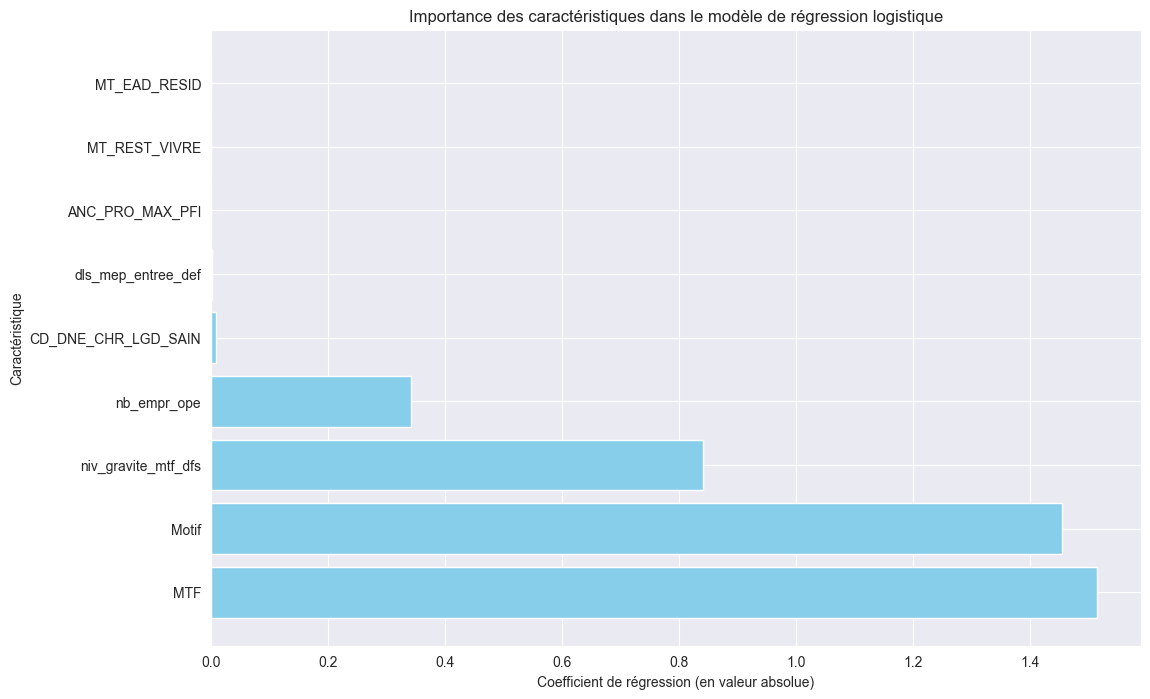

In [1160]:
coefficients = model.coef_[0]

feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Abs_Coefficient'], color='skyblue')
plt.xlabel('Coefficient de régression (en valeur absolue)')
plt.ylabel('Caractéristique')
plt.title('Importance des caractéristiques dans le modèle de régression logistique')
plt.show()


In [1161]:
feature_importance_df

,Feature,Coefficient,Abs_Coefficient
2,MTF,1.512989e+00,1.512989e+00
0,Motif,1.453353e+00,1.453353e+00
1,niv_gravite_mtf_dfs,8.407985e-01,8.407985e-01
5,nb_empr_ope,-3.411140e-01,3.411140e-01
6,CD_DNE_CHR_LGD_SAIN,-8.685400e-03,8.685400e-03
3,dls_mep_entree_def,-1.943924e-03,1.943924e-03
4,ANC_PRO_MAX_PFI,-8.601680e-04,8.601680e-04
8,MT_REST_VIVRE,-4.381414e-06,4.381414e-06
7,MT_EAD_RESID,2.259174e-07,2.259174e-07


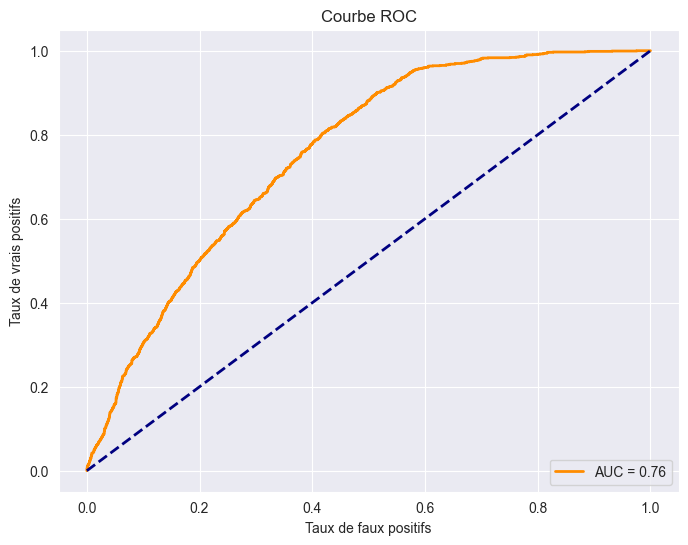

In [1162]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Feature selection

In [1164]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Normaliser les données
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Appliquer la régression logistique avec Lasso
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test
y_pred = lasso_model.predict(X_test_scaled)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision : {accuracy}")

# Calculer l'AUC
auc = roc_auc_score(y_test, lasso_model.predict_proba(X_test_scaled)[:, 1])
print(f"AUC : {auc}")

# Obtenir les noms des variables sélectionnées
selected_features = X_train.columns[lasso_model.coef_[0] != 0]
print(f"Variables sélectionnées : {selected_features}")

Précision : 0.7183076923076923
AUC : 0.7549153234824352
Variables sélectionnées : Index(['Motif', 'niv_gravite_mtf_dfs', 'MTF', 'dls_mep_entree_def',
       'ANC_PRO_MAX_PFI', 'nb_empr_ope', 'CD_DNE_CHR_LGD_SAIN', 'MT_EAD_RESID',
       'MT_REST_VIVRE'],
      dtype='object')


Précision : 0.7263076923076923
AUC : 0.7630998983917008

In [1137]:
lasso_model.coef_

array([[ 0.        ,  2.91870618,  0.8351277 ,  1.89449971, -0.66946584,
        -0.72951559, -1.89256304, -0.0497456 ,  0.27457352,  0.        ,
        -0.69938487]])

# LASSO

.

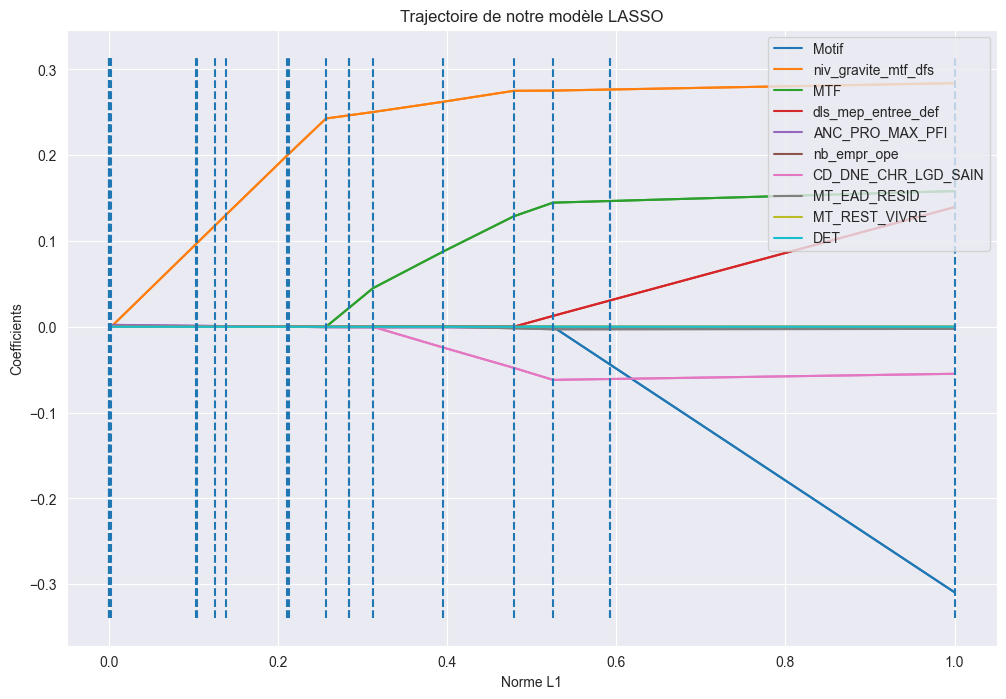

In [1165]:
from sklearn import linear_model
from sklearn.linear_model import Lasso, LassoCV

X_traindf = X_train.copy()
X_train = X_train.to_numpy()
y_train = y_train


# Coefficients de la trajectoire du LASSO 
_, _, coefs = linear_model.lars_path(X_train, y_train, method="lasso", verbose=True)

# Application de la norme L1 à nos coefficients 
xx = np.sum(np.abs(coefs.T), axis=1) #somme des valeurs absolues des coefficients tranposés
xx = xx/xx[-1] # normalisation p/r à leur valeur max atteinte (norme L1) 

# Graphique
plt.figure(figsize=(12, 8))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
lines = plt.plot(xx, coefs.T)
plt.legend(lines, data.columns, loc='upper right')
plt.vlines(xx, ymin, ymax, linestyle="dashed") #permet de savoir lorsqu'un coefficient entre et sort du modèle
plt.xlabel("Norme L1") # norme L1
plt.ylabel("Coefficients") # valeurs des coefficients 
plt.title("Trajectoire de notre modèle LASSO")
plt.axis("tight")
plt.show()

In [1139]:
lasso_model=Lasso(alpha = 0.6).fit(X_train,y_train)
coefs = lasso_model.coef_
coefs = pd.DataFrame(coefs)


In [1140]:
liste = ['intecept']
liste.extend(data.drop(columns =['arrete','cd_op','DET']).columns.to_list())
coefs['Variable'] = liste
coefs.rename(columns ={0 : 'coef'}, inplace= True)
coefs[coefs['coef']!=0]['Variable'].to_list()

['dls_mep_entree_def',
 'ANC_PRO_MAX_PFI',
 'MT_EAD_RESID',
 'cum_dec',
 'MT_REST_VIVRE']

# RFE

In [1171]:
from sklearn.feature_selection import RFE
model = LogisticRegression(penalty='l1', solver='liblinear')

# Utiliser la méthode RFE pour sélectionner les variables les plus importantes
# Vous pouvez ajuster le nombre de variables à sélectionner avec le paramètre 'n_features_to_select'
rfe = RFE(model, n_features_to_select=10)  # Vous pouvez ajuster ce nombre selon vos besoins

# Adapter le modèle RFE sur les données d'entraînement
rfe.fit(X_traindf, y_train)

# Sélectionner les variables importantes
selected_features = X_traindf.columns[rfe.support_]

# Appliquer la sélection sur l'ensemble d'entraînement et de test
X_train_selected = X_traindf[selected_features]
X_test_selected = X_test[selected_features]

# Entraîner le modèle de régression logistique sur les variables sélectionnées
model.fit(X_train_selected, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test_selected)

# Calculer l'AUC (Area Under the Curve) pour évaluer la performance du modèle
auc = roc_auc_score(y_test, y_pred)

print("Variables sélectionnées:", selected_features)
print("AUC de la régression logistique sur les variables sélectionnées:", auc)

Variables sélectionnées: Index(['const', 'Motif', 'niv_gravite_mtf_dfs', 'MTF', 'dls_mep_entree_def',
       'ANC_PRO_MAX_PFI', 'nb_empr_ope', 'CD_DNE_CHR_LGD_SAIN', 'MT_EAD_RESID',
       'MT_REST_VIVRE'],
      dtype='object')
AUC de la régression logistique sur les variables sélectionnées: 0.6608579415015606
